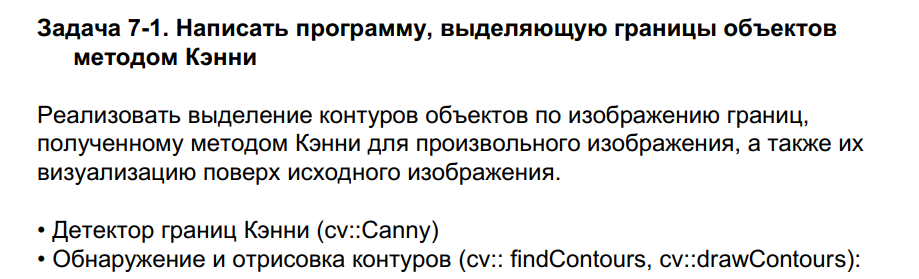

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets


def canny(img, low_threshold, high_threshold):
        
    img_blur = cv.blur(cv.cvtColor(img, cv.COLOR_BGR2GRAY), (3, 3))
    edges = cv.Canny(img_blur, low_threshold, high_threshold)
    return edges

In [2]:
img = cv.imread('cards.png')
assert img is not None, "file could not be read"


def interactive_canny(lt, ht):
    img_blur = cv.blur(cv.cvtColor(img, cv.COLOR_BGR2GRAY), (3, 3))
    edges = cv.Canny(img_blur, lt, ht)
    plt.imshow(edges), plt.xticks([]), plt.yticks([])
    plt.show()    

    
interact(interactive_canny, lt=widgets.IntSlider(min=0, max=255, step=1, value=112),
         ht=widgets.IntSlider(min=0, max=255, step=1, value=21));

interactive(children=(IntSlider(value=112, description='lt', max=255), IntSlider(value=21, description='ht', m…

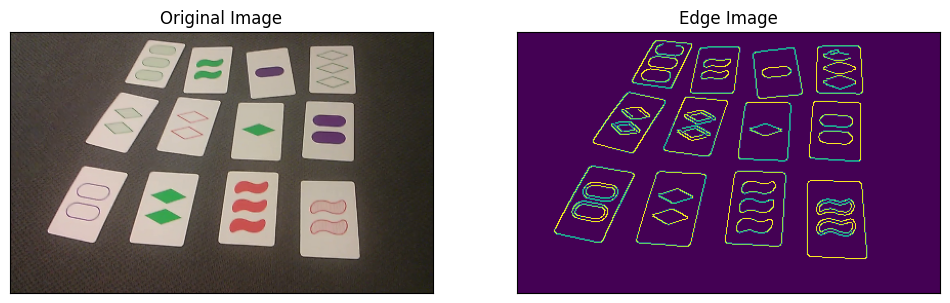

In [3]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)


edged = canny(img, 112, 21)


plt.figure(figsize=(12,8))
plt.subplot(121),plt.imshow(img_rgb)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edged)
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [4]:
def draw_contours(edges, img):
    img_copy = img.copy()
    contours = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)[0]
    cv.drawContours(img_copy, contours, -1, (0, 0, 255), 2)
    plt.figure(figsize=(12,6))
    plt.imshow(img_copy), plt.xticks([]), plt.yticks([])
    plt.show()

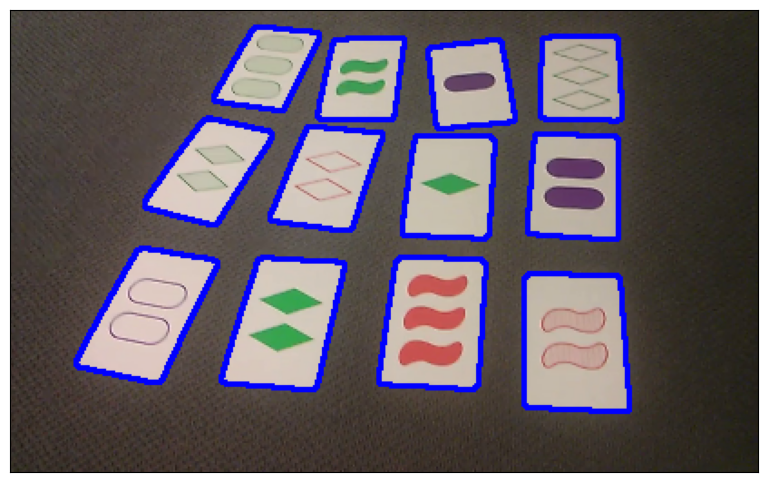

In [5]:
draw_contours(edged, img_rgb)

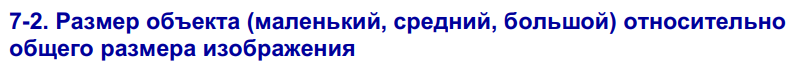

In [8]:
image = cv.imread("mars.jpg")
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

@widgets.interact_manual(
    lt=(0, 255), ht=(0, 255), k=(1,20))
def biggest_object_area(lt=100, ht=100, k=7):
    edged = cv.Canny(gray.copy(), lt, ht) 
    kernel = cv.getStructuringElement(cv.MORPH_RECT, (k, k))
    closed = cv.morphologyEx(edged, cv.MORPH_CLOSE, kernel)
    contours, hierarchy = cv.findContours(closed.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    sorted_contour = sorted(contours, key=lambda x: cv.contourArea(x), reverse=True)
    largestcontour = sorted_contour[0]    
    s = cv.contourArea(largestcontour) / (image.shape[0] * image.shape[1])
    if s < 0.3:
        print("Small")
    elif  0.3<= s <=0.5:
        print("Medium")
    elif  0.5 < s:
        print("Big")
    results = image.copy()
    cv.drawContours(results, [largestcontour],0,(0,0,255),10) 
    plt.imshow(results), plt.xticks([]), plt.yticks([])
    plt.show()

interactive(children=(IntSlider(value=100, description='lt', max=255), IntSlider(value=100, description='ht', …

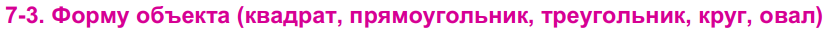

In [18]:
img = cv.imread("hockey_stick.jpg")
assert img is not None, "file could not be read"
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

@widgets.interact_manual(
    lt=(0, 255), ht=(0, 255), k=(1,20))
def object_shape(lt=100, ht=100, k=7):
    result = img.copy()
    edged = cv.Canny(gray.copy(), lt, ht) 
    kernel = cv.getStructuringElement(cv.MORPH_RECT, (k, k))
    closed = cv.morphologyEx(edged, cv.MORPH_CLOSE, kernel)
    contours, hierarchy = cv.findContours(closed.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    sorted_contour = sorted(contours, key=lambda x: cv.contourArea(x), reverse=True)
    largestcontour = sorted_contour[0]
    
    M = cv.moments(largestcontour) 
    if M['m00'] != 0.0: 
        x = int(M['m10']/M['m00']) 
        y = int(M['m01']/M['m00'])
    approx = cv.approxPolyDP(largestcontour, 0.01 * cv.arcLength(largestcontour, True), True)
    
    if (len(approx) == 3):
        cv.putText(results, 'Triangle', (x, y), 
                   cv.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 3) 
    if (len(approx) == 4):
        _, _, w, h = cv.boundingRect(approx)
        ratio = float(w)/h
        if ratio >= 0.9 and ratio <= 1.1:                
            cv.putText(result, 'Square', (x, y), 
                        cv.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2) 
        else:                
            cv.putText(result, 'Rectangle', (x, y), 
                        cv.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2)
    else:
        ellipse = cv.fitEllipse(approx)
        ratio = ellipse[1][0] / ellipse[1][1]
        ratio = ratio if ratio < 1 else (1 / ratio)
        if (ratio >= 0.9):
            cv.putText(result, 'Circle', (x, y), 
                        cv.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2)
        else:
            cv.putText(result, 'Ellipse', (x, y), 
                        cv.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2)        
                
    cv.drawContours(result, [largestcontour],0,(0,0,255),10) 
    plt.imshow(result), plt.xticks([]), plt.yticks([])
    plt.show()

interactive(children=(IntSlider(value=100, description='lt', max=255), IntSlider(value=100, description='ht', …